In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('DATASETS/fullyclean.csv')
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
a=list(df['DR1_020'])
l=[]
for i in range(0,len(a)):
  p=a[i].split(":")
  b=int(p[0])
  l.append(b)
df['DR1_020']=l

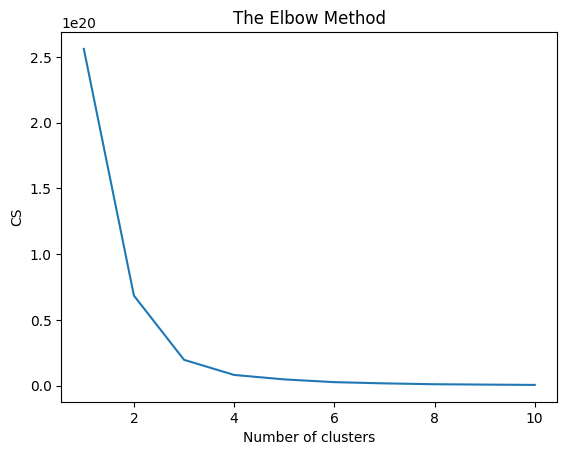

In [9]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [13]:
km=KMeans(n_clusters=4)  # for graph we are taking  n=4 clusters
y_predicted=km.fit_predict(df)
df['clusters']=y_predicted 

In [14]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
df4=df[df.clusters==3]

In [16]:
c1=df1[['DR1_020','DR1IKCAL']]
c2=df2[['DR1_020','DR1IKCAL']]
c3=df3[['DR1_020','DR1IKCAL']]
c4=df4[['DR1_020','DR1IKCAL']]
c1=df1.groupby(['DR1_020']).sum()
c2=df2.groupby(['DR1_020']).sum()
c3=df3.groupby(['DR1_020']).sum()
c4=df4.groupby(['DR1_020']).sum()
a=c1['DR1IKCAL'].sum()
b=c2['DR1IKCAL'].sum()
c=c3['DR1IKCAL'].sum()
d=c4['DR1IKCAL'].sum()
c1['frequency']=c1['DR1IKCAL']/a
c2['frequency']=c2['DR1IKCAL']/b
c3['frequency']=c3['DR1IKCAL']/c
c4['frequency']=c4['DR1IKCAL']/d

In [18]:
time_axis = []
for i in range(0,24):
    time_axis.append(i)

Text(0, 0.5, 'Relative Frequecncy of the time of the largest daily enery consumption \n event for the individual  in each cluster')

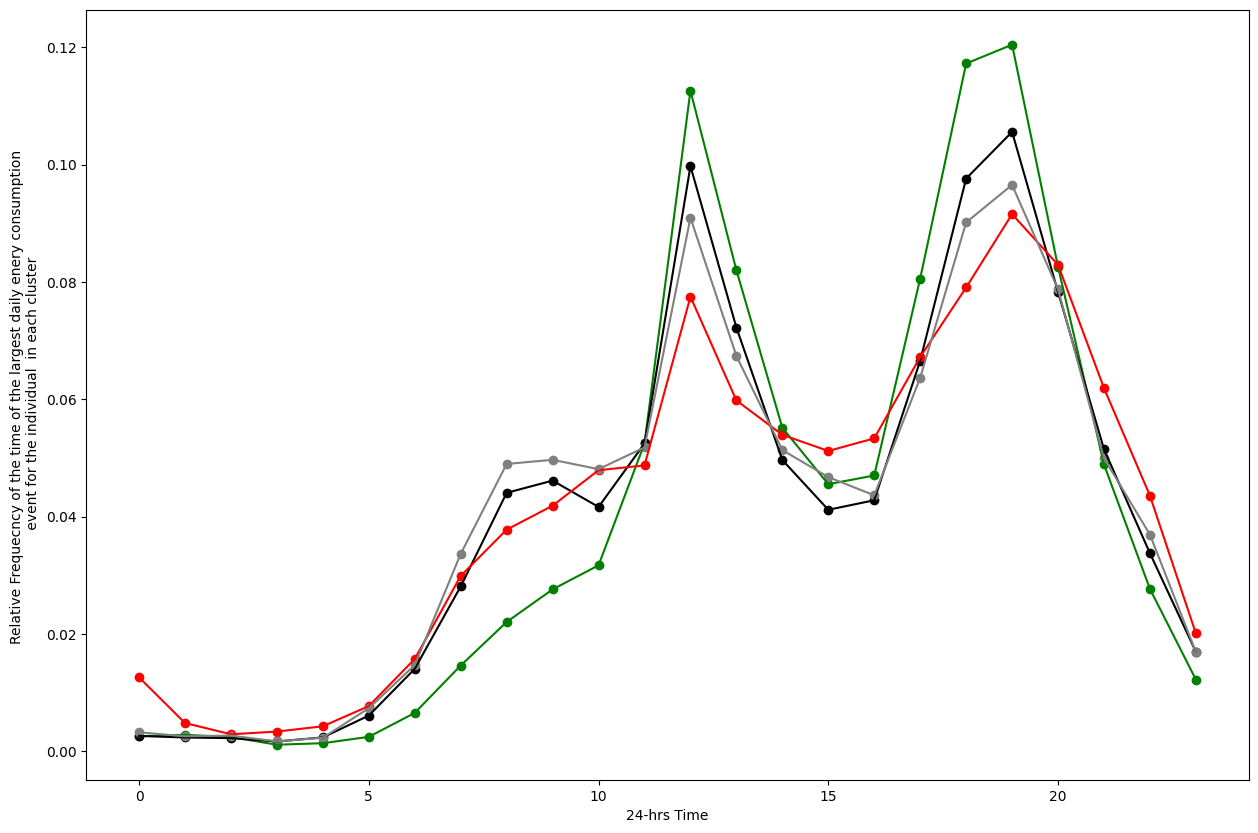

In [19]:
plt.figure(figsize=(15,10))


plt.plot(time_axis,c1['frequency'],color='green')
plt.plot(time_axis,c2['frequency'],color='black')
plt.plot(time_axis,c3['frequency'],color='red')
plt.plot(time_axis,c4['frequency'],color='grey')
plt.scatter(time_axis,c1['frequency'],color='green')
plt.scatter(time_axis,c2['frequency'],color='black')
plt.scatter(time_axis,c3['frequency'],color='red')
plt.scatter(time_axis,c4['frequency'],color='grey')
plt.xlabel('24-hrs Time')
plt.ylabel('Relative Frequecncy of the time of the largest daily enery consumption \n event for the individual  in each cluster')

# HEI Score

Here we have have calculated HEI score for 5 factors as per 2015 HEI report

In [31]:
ok = df.groupby(['SEQN']).sum()
kk = ok[['DR1IKCAL','DR1IPROT','DR1ITFAT','DR1ISFAT',
       'DR1IMFAT', 'DR1IPFAT','DR1ICARB','DR1ISUGR','DR1ISODI']].copy()

In [32]:
kk["fattyacid"]=(kk["DR1IPFAT"]+kk['DR1IMFAT'])/kk['DR1ISFAT']  # cant be divide zero
s=kk['fattyacid'].tolist()
for i in range(len(s)):
    if(s[i]>=2.5):
        s[i]=10
    elif(s[i]<=1.2):
        s[i]=0
    elif(s[i]>1.2 and s[i]<2.5):
        s[i]=round(7.69*s[i]-9.23)
    else:
        s[i]=0
kk['fat_score']=s   

In [33]:
kk['SODI_check']=kk['DR1ISODI']/kk['DR1IKCAL']    # gm per kcal
k=kk['SODI_check'].tolist()
k
for i in range(len(k)):
    if(k[i]>=2):
        k[i]=0
    elif(k[i]<=1.1):
        k[i]=10
    elif(k[i]>1.1 and k[i]<2.0):
        k[i]=round(-11.1*k[i]+22.22)
    else:
        k[i]=0
kk['SODI_score']=k  


In [34]:
kk['PROT_check']=(kk['DR1IPROT']*1000/kk['DR1IKCAL'])/28.35     #
k=kk['PROT_check'].tolist()
k
for i in range(len(k)):
    if(k[i]>=3.3):
        k[i]=10
    elif(k[i]<=0):
        k[i]=0
    elif(k[i]>0 and k[i]<3.3):
        k[i]=round(3.03*k[i])
    else:
        k[i]=0
kk['PROT_score']=k


In [35]:
kk['SFAT_check']=(kk['DR1ISFAT']*9/kk['DR1IKCAL'])*100     #
k=kk['SFAT_check'].tolist()
for i in range(len(k)):
    if(k[i]>=16):
        k[i]=0
    elif(k[i]<=8):
        k[i]=10
    elif(k[i]>8 and k[i]<16):
        k[i]=round(-1.25*k[i]+20)
    else:
        k[i]=0
kk['SFAT_score']=k

In [36]:
kk['SUG_check']=(kk['DR1ISUGR']*4/kk['DR1IKCAL'])*100     #
k=kk['SUG_check'].tolist()
for i in range(len(k)):
    if(k[i]>=26):
        k[i]=0
    elif(k[i]<=6.5):
        k[i]=10
    elif(k[i]>6.5 and k[i]<26):
        k[i]=round(-0.51*k[i]+13.33)
    else:
        k[i]=0
kk['SUG_score']=k


In [37]:
kk=kk.drop(['DR1IKCAL', 'DR1IPROT', 'DR1ITFAT', 'DR1ISFAT', 'DR1IMFAT', 'DR1IPFAT',
       'DR1ICARB', 'DR1ISUGR', 'DR1ISODI', 'fattyacid',
        'SODI_check','SFAT_check','SUG_check','PROT_check'],axis=1)

In [38]:
kk['HEI_score']=kk['SODI_score']+kk['fat_score']+kk['PROT_score']+kk['SUG_score']

In [39]:
kk

,fat_score,SODI_score,PROT_score,SFAT_score,SUG_score,HEI_score
SEQN,,,,,,
41475.0,1,2,4,2,3,10
41479.0,10,0,5,8,5,20
41481.0,10,10,2,10,0,22
41482.0,10,5,5,10,3,23
41485.0,3,0,5,1,7,15
...,...,...,...,...,...,...
102944.0,3,0,4,10,3,10
102946.0,5,0,6,10,9,20
102949.0,0,10,5,0,6,21


In [40]:
kk.describe()

,fat_score,SODI_score,PROT_score,SFAT_score,SUG_score,HEI_score
count,21392.000000,21392.000000,21392.000000,21392.000000,21392.000000,21392.000000
mean,5.171933,4.419830,4.182966,6.191707,3.587369,17.362098
std,3.663947,3.570238,1.413418,3.483741,3.370064,5.740754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000,0.000000,13.000000
50%,5.000000,4.000000,4.000000,7.000000,3.000000,17.000000
75%,9.000000,7.000000,5.000000,10.000000,6.000000,21.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,40.000000
